# 시계열 예측문제

- 사인파형 시계열을 입력으로 다음 스템의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [6]:
import numpy as np
import matplotlib.pyplot as plt

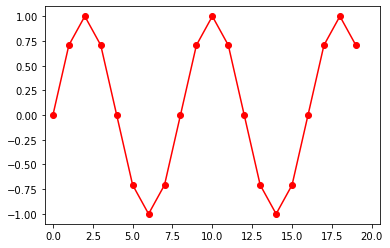

In [7]:
s = np.sin(2*np.pi*0.125*np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

## 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환

###(대각선 위의 성분들이 같으 정사각형 행렬)

In [8]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [9]:
x_train = S[:-1, :3][:, :, np.newaxis]
y_train = S[:-1, 3]
x_train.shape, y_train.shape

((18, 3, 1), (18,))

In [12]:
x_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [13]:
y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

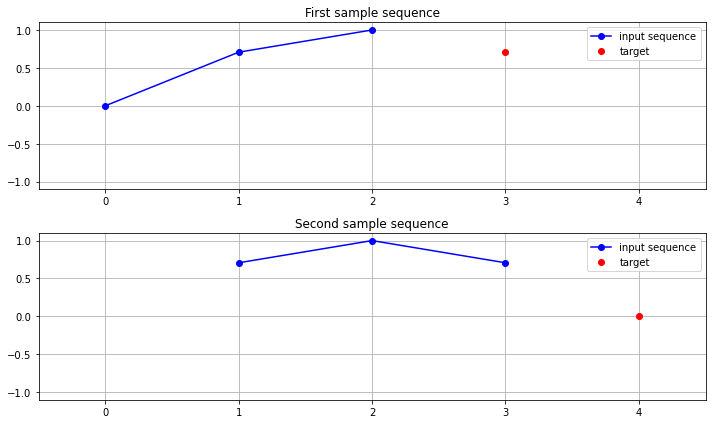

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], x_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], x_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

## RNN으로해결 - SimpleRNN()사용

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [22]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='mse', optimizer='sgd')

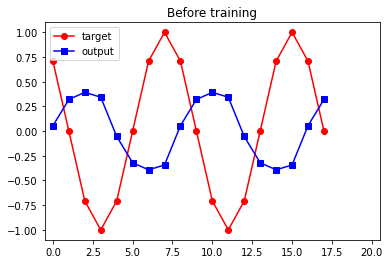

In [24]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [25]:
history = model.fit(x_train, y_train, epochs=100)

Train on 18 samples
Epoch 1/100
18/18 [==============================] - 1s 30ms/sample - loss: 0.8159
Epoch 2/100
18/18 [==============================] - 0s 55us/sample - loss: 0.7483
Epoch 3/100
18/18 [==============================] - 0s 55us/sample - loss: 0.6868
Epoch 4/100
18/18 [==============================] - 0s 54us/sample - loss: 0.6307
Epoch 5/100
18/18 [==============================] - 0s 87us/sample - loss: 0.5796
Epoch 6/100
18/18 [==============================] - 0s 111us/sample - loss: 0.5329
Epoch 7/100
18/18 [==============================] - 0s 111us/sample - loss: 0.4903
Epoch 8/100
18/18 [==============================] - 0s 111us/sample - loss: 0.4513
Epoch 9/100
18/18 [==============================] - 0s 110us/sample - loss: 0.4157
Epoch 10/100
18/18 [==============================] - 0s 111us/sample - loss: 0.3831
Epoch 11/100
18/18 [==============================] - 0s 55us/sample - loss: 0.3532
Epoch 12/100
18/18 [==============================] - 0s 111

Epoch 98/100
18/18 [==============================] - 0s 54us/sample - loss: 0.0048
Epoch 99/100
18/18 [==============================] - 0s 111us/sample - loss: 0.0047
Epoch 100/100
18/18 [==============================] - 0s 111us/sample - loss: 0.0047


## 결과확인

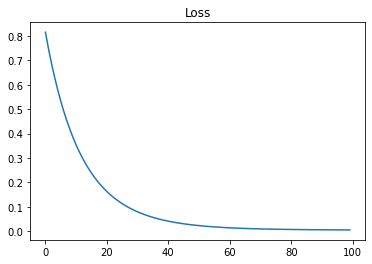

In [27]:
plt.plot(history.history["loss"])
plt.title('Loss')
plt.show()

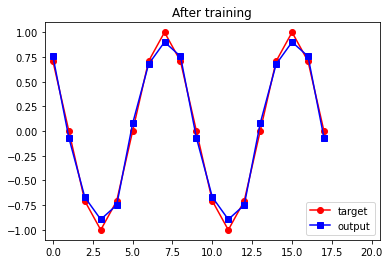

In [28]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("After training")
plt.show()

In [29]:
# 입력에 대한 weghts
model.weights[0]

<tf.Variable 'simple_rnn/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.47842133,  0.09806996,  0.6581065 , -0.6540226 , -0.6039167 ,
         0.45866904, -0.14184843, -0.28680977,  0.38632032,  0.39071473]],
      dtype=float32)>

In [30]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.5031847 , -0.27986357,  0.3092402 ,  0.4173125 , -0.10100241,
        -0.1854901 ,  0.3658138 , -0.46676123,  0.19936249, -0.09507574],
       [-0.16087493,  0.15729053, -0.5281627 ,  0.45426965,  0.3865887 ,
         0.35373423, -0.05864759, -0.40691763,  0.0870088 ,  0.15791182],
       [ 0.3988101 ,  0.1646125 ,  0.27449593,  0.2745656 ,  0.2051124 ,
         0.41736114, -0.17821999,  0.21296802, -0.59349126, -0.26318848],
       [ 0.4107815 , -0.40988198, -0.31221566, -0.2693878 , -0.1092681 ,
         0.1887359 , -0.41954985, -0.04432413,  0.40578046, -0.23545803],
       [-0.1418978 , -0.10019956,  0.5794489 , -0.4482857 ,  0.2150287 ,
         0.33771402, -0.08448323, -0.5292904 ,  0.18059233,  0.23517163],
       [-0.4463264 , -0.6871191 , -0.09963143,  0.14399974, -0.13783008,
         0.11348417, -0.11566957, -0.0819999 , -0.5037465 , -0.17223166],
       [ 0.20058405, -0.09400997,  0

In [31]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn/bias:0' shape=(10,) dtype=float32, numpy=
array([-1.4550169e-03,  3.0734090e-04,  6.6746736e-04, -1.2374702e-03,
        2.0469704e-03,  2.2927235e-04, -1.3652473e-03, -1.0129076e-03,
        4.6548105e-04, -3.8020888e-05], dtype=float32)>

## model2 5개

In [54]:
model2 = Sequential()
model2.add(SimpleRNN(5, input_shape=(3,1)))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [55]:
model2.compile(loss='mse', optimizer='sgd')

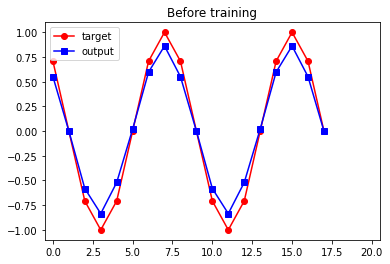

In [69]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model2.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [57]:
history2 = model2.fit(x_train, y_train, epochs=100)

Train on 18 samples
Epoch 1/100
18/18 [==============================] - 1s 35ms/sample - loss: 0.6975
Epoch 2/100
18/18 [==============================] - 0s 55us/sample - loss: 0.6632
Epoch 3/100
18/18 [==============================] - 0s 55us/sample - loss: 0.6314
Epoch 4/100
18/18 [==============================] - 0s 55us/sample - loss: 0.6018
Epoch 5/100
18/18 [==============================] - 0s 55us/sample - loss: 0.5741
Epoch 6/100
18/18 [==============================] - 0s 111us/sample - loss: 0.5483
Epoch 7/100
18/18 [==============================] - 0s 111us/sample - loss: 0.5240
Epoch 8/100
18/18 [==============================] - 0s 111us/sample - loss: 0.5013
Epoch 9/100
18/18 [==============================] - 0s 111us/sample - loss: 0.4799
Epoch 10/100
18/18 [==============================] - 0s 111us/sample - loss: 0.4597
Epoch 11/100
18/18 [==============================] - 0s 55us/sample - loss: 0.4406
Epoch 12/100
18/18 [==============================] - 0s 55u

Epoch 98/100
18/18 [==============================] - 0s 111us/sample - loss: 0.0182
Epoch 99/100
18/18 [==============================] - 0s 55us/sample - loss: 0.0176
Epoch 100/100
18/18 [==============================] - 0s 112us/sample - loss: 0.0169


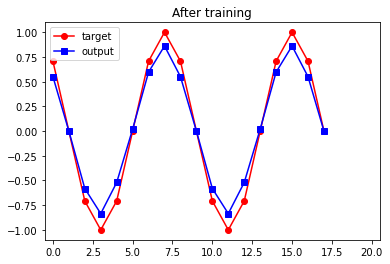

In [64]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model2.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("After training")
plt.show()

## model2 20개

In [48]:
model3 = Sequential()
model3.add(SimpleRNN(20, input_shape=(3,1)))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [49]:
model3.compile(loss='mse', optimizer='sgd')

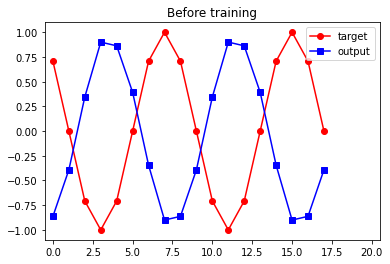

In [65]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model3.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [66]:
history3 = model3.fit(x_train, y_train, epochs=100)

Train on 18 samples
Epoch 1/100
18/18 [==============================] - 1s 28ms/sample - loss: 1.7755
Epoch 2/100
18/18 [==============================] - 0s 55us/sample - loss: 1.6137
Epoch 3/100
18/18 [==============================] - 0s 111us/sample - loss: 1.4705
Epoch 4/100
18/18 [==============================] - 0s 111us/sample - loss: 1.3431
Epoch 5/100
18/18 [==============================] - 0s 111us/sample - loss: 1.2290
Epoch 6/100
18/18 [==============================] - 0s 111us/sample - loss: 1.1263
Epoch 7/100
18/18 [==============================] - 0s 55us/sample - loss: 1.0335
Epoch 8/100
18/18 [==============================] - 0s 55us/sample - loss: 0.9493
Epoch 9/100
18/18 [==============================] - 0s 111us/sample - loss: 0.8727
Epoch 10/100
18/18 [==============================] - 0s 111us/sample - loss: 0.8028
Epoch 11/100
18/18 [==============================] - 0s 111us/sample - loss: 0.7388
Epoch 12/100
18/18 [==============================] - 0s 1

Epoch 98/100
18/18 [==============================] - 0s 109us/sample - loss: 5.6767e-04
Epoch 99/100
18/18 [==============================] - 0s 112us/sample - loss: 5.4634e-04
Epoch 100/100
18/18 [==============================] - 0s 111us/sample - loss: 5.2700e-04


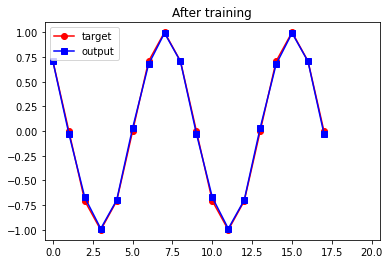

In [67]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model3.predict(x_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("After training")
plt.show()